In [ ]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["INR", "EUR"]
    total: float

In [ ]:
def calculate_total_usd(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08  # Assuming 1.08 increase in amount
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 82.0  # Assuming conversion rate of 82.0
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 0.85  # Assuming conversion rate of 0.85
    return state    

def choose_conversion(state: PortfolioState) -> str:
   return state["target_currency"]

In [5]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calculate_total_usd)
builder.add_node("convert_to_inr", convert_to_inr)
builder.add_node("convert_to_eur", convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR": "convert_to_inr",
        "EUR": "convert_to_eur"
    }
)
builder.add_edge(["convert_to_inr", "convert_to_eur"], END)

graph = builder.compile()


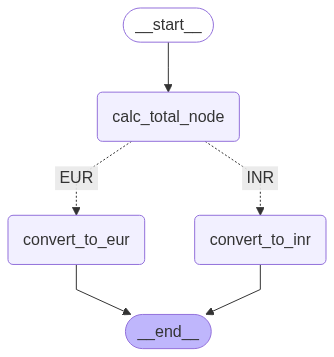

In [6]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"amount_usd": 1000, "target_currency": "EUR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 918.0}

In [8]:
graph.invoke({"amount_usd": 1000, "target_currency": "INR"})

{'amount_usd': 1000, 'total_usd': 1080.0, 'target_currency': 'INR'}